# Supervised Modelling

First, the necessary libraries are imported:

In [1]:
import pandas as pd
import numpy as np

#Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Classification and regression models
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model selection and optimization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

First, import the data to be modelled and gather the X and y values, dropping any columns that are unnecessary for the supervised modelling portion of the project.

In [2]:
customer_model = pd.read_csv('customer_model.csv')
customer_model.drop(columns=['Unnamed: 0','product_4000 · Revenue'],inplace=True)

In [3]:
customer_model.head()

cust_id  size  corporation  jobs  revenue  frequency  recency  cust_age  \
0   1000.0   0.0          0.0   1.0   1065.0          1     2623      2623   
1   1002.0   0.0          0.0   7.0   1537.0          5     2138      2959   
2   1004.0   0.0          1.0   3.0    318.0          3     2625      3181   
3   1008.0   0.0          0.0   1.0     50.0          1     2925      2925   
4   1009.0   1.0          1.0   3.0    350.0          3     1957      2937   

   manufacturer_loc_Admin  manufacturer_loc_Industrial Fabric  ...  \
0                       0                                   0  ...   
1                       0                                   0  ...   
2                       0                                   0  ...   
3                       0                                   0  ...   
4                       0                                   0  ...   

   product_5065 · Over Laminates  product_5210 · Metal Work - Materials  \
0                            0.0                                    0.0   
1                            0.0                                    0.0   
2                            0.0                                    0.0   
3                            0.0                                    0.0   
4                            0.0                                    0.0   

   product_5310 · Substrates  product_5325 · Printable Banner  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   

   product_5500 · Awning Fabrics  product_5760 · Sign Material - Coroplast  \
0                            0.0                                       0.0   
1                            0.0                                       0.0   
2                            0.0                                       0.0   
3                            0.0                                       0.0   
4                            0.0                                       0.0   

   product_5782 · Sign Material  - Others  product_5830 · Shipping Costs  \
0                                     0.0                            0.0   
1                                     0.0                            0.0   
2                                     0.0                            0.0   
3                                     0.0                            0.0   
4                                     0.0                            0.0   

   product_6155 · Donations  product_7365 · Donations  
0                       0.0                       0.0  
1                       0.0                       0.0  
2                       0.0                       0.0  
3                       0.0                       0.0  
4                       0.0                       0.0  

[5 rows x 93 columns]

X values included all columns except for revenue, jobs, frequency, and Customer ID.

In [3]:
X = customer_model.iloc[:,1:]
y = customer_model.iloc[:,4]

In [4]:
X.drop(['revenue','jobs','frequency','Customer ID'],axis=1,inplace=True)

The y which was examined was the annual revenue of the customer - calculated by taking customer revenue divided by customer age.

For a linear regression model, the y values were transformed by taking the log to improve the fit of the line 

In [4]:
y = customer_model['revenue']/customer_model['cust_age']
y = np.log(y)

y = y.replace({-np.inf: 0})
y = y.replace({np.NaN: 0})

## Fitting a Linear Regression Model

# Linear Regression - Predictions

First, the data was split into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

First, the data is scaled and the linear regression model summary is produced

In [11]:
my_scaler = StandardScaler()
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

Using statsmodels, the linear regression was fit and the summary produced.

In [12]:
X_withconstant = sm.add_constant(X)
#1. Instantiate
LR_model = sm.OLS(y,X_withconstant)

# 2. Fit Model
LR_model = LR_model.fit()

# 3. Summary
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     33.40
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.53e-310
Time:                        13:21:54   Log-Likelihood:                -3335.3
No. Observations:                2135   AIC:                             6833.
Df Residuals:                    2054   BIC:                             7292.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.6734      0.227      2.963      0.003       0.228       1.119
size                                               0.2367      0.087      2.730      0.006       0.067       0.407
corporation                                        0.1408      0.087      1.612      0.107      -0.030       0.312
recency                                           -0.0008   3.49e-05    -22.761      0.000      -0.001      -0.001
cust_age                                       -9.701e-05   3.33e-05     -2.913      0.004      -0.000   -3.17e-05
manufacturer_loc_Admin                            -0.2211      0.941     -0.235      0.814      -2.067       1.624
manufacturer_loc_Industrial Fabric                 0.6916      0.381      1.813      0.070      -0.056       1.439
manufacturer_loc_Squamish                         -0.1338      0.256     -0.522      0.602      -0.636       0.369
manufacturer_loc_Surrey                            0.3367      0.267      1.260      0.208      -0.187       0.861
region_bc_island                                  -0.3425      0.237     -1.448      0.148      -0.806       0.121
region_bc_lower_main                               0.1090      0.155      0.703      0.482      -0.195       0.413
region_bc_lower_west                               0.2630      0.183      1.438      0.151      -0.096       0.622
region_bc_north                                    0.1968      0.196      1.005      0.315      -0.187       0.581
region_bc_northshore                               0.2906      0.121      2.398      0.017       0.053       0.528
region_bc_south                                    0.4145      0.191      2.172      0.030       0.040       0.789
region_bc_west                                    -0.1990      0.248     -0.801      0.423      -0.686       0.288
region_central_can                                -0.2354      0.196     -1.202      0.230      -0.620       0.149
region_prairies_can                               -0.0873      0.275     -0.318      0.751      -0.626       0.452
region_squamish                                   -0.4210      0.067     -6.279      0.000      -0.553      -0.290
region_surrey                                      0.4415      0.130      3.383      0.001       0.186       0.697
region_us                                          0.2113      0.311      0.680      0.497      -0.398       0.820
region_vancouver                                   0.0853      0.087      0.983      0.326      -0.085       0.256
region_whistler                                   -0.0534      0.102     -0.524      0.601      -0.253       0.146
industry_automotive_transportation                 0.0084      0.108      0.077      0.938   

Adjusted R squared values of 0.548 indicate that there is a reasonable fit of the line and conclusions can be drawn from the coefficients.

Because the X data was scaled, coefficients are comparable. The coefficients were then organized into a dataframe to compare, along with p-values to ensure coefficients are statistically significant.

In [13]:
df_results = pd.DataFrame({'name':list(X_withconstant.columns),'coefficient':list(LR_model.params),'pvalue':list(LR_model.pvalues)})

In [14]:
df_results.sort_values('coefficient',ascending=False,inplace=True)

In [15]:
df_results

name  coefficient        pvalue
77                         product_5040 · Fabrics     2.239033  8.030622e-03
76        product_5020 · Pressure Sensitive Vinyl     1.201976  3.796842e-02
73                  product_4900 · Income - Other     1.112198  2.806407e-03
88                       product_7365 · Donations     0.763340  2.639310e-01
42                 product_2018 · Deferred Income     0.718236  7.414242e-03
6              manufacturer_loc_Industrial Fabric     0.691554  6.993493e-02
0                                           const     0.673442  3.078163e-03
72               product_4800 · Promotional Items     0.530767  1.598690e-01
19                                  region_surrey     0.441481  7.291318e-04
50           product_4120 · Disbursement Recovery     0.419628  1.136057e-01
14                                region_bc_south     0.414516  2.999135e-02
25                                  industry_food     0.372416  1.756046e-05
8                         manufacturer_loc_Surrey     0.336708  2.079110e-01
64           product_4540 · Printing - Stationary     0.291541  1.943292e-01
13                           region_bc_northshore     0.290591  1.658865e-02
11                           region_bc_lower_west     0.263018  1.505838e-01
1                                            size     0.236721  6.387287e-03
20                                      region_us     0.211272  4.965056e-01
86                  product_5830 · Shipping Costs     0.207884  1.578971e-05
12                                region_bc_north     0.196831  3.149549e-01
44            product_4050 · Awnings & Structures     0.195141  2.000824e-10
24         industry_construction_home_improvement     0.166508  8.095305e-03
27                        industry_health_fitness     0.162034  1.082513e-01
2                                     corporation     0.140760  1.071192e-01
43            product_4040 · Awnings & Structures     0.138796  6.076231e-05
34            industry_tourism_film_entertainment     0.135605  1.387229e-01
56                product_4260 · Signs - Electric     0.115121  5.666041e-03
33                                industry_retail     0.113993  1.942135e-01
71             product_4750 · Installation Income     0.113074  1.599738e-06
32                           industry_real_estate     0.112367  2.860523e-01
..                                            ...          ...           ...
66             product_4580 · Design Work - Other    -0.045740  1.564317e-01
87                       product_6155 · Donations    -0.049479  9.723912e-01
22                                region_whistler    -0.053362  6.005125e-01
29              industry_logging_mining_utilities    -0.059723  6.858586e-01
37                     product_1255 · Sign Frames    -0.076714  9.300952e-01
17                            region_prairies_can    -0.087329  7.506733e-01
85         product_5782 · Sign Material  - Others    -0.114649  6.296544e-01
7                       manufacturer_loc_Squamish    -0.133770  6.016821e-01
67          product_4600 · Tarps, Tent Frames etc    -0.144296  3.079988e-01
70  product_4720 · Shippin & Recoverable Expenses    -0.153852  1.314496e-04
15                                 region_bc_west    -0.198980  4.229928e-01
5                          manufacturer_loc_Admin    -0.221051  8.143078e-01
16                             region_central_can    -0.235370  2.296776e-01
30            industry_manufacturing_distribution    -0.241051  2.206690e-01
81                      product_5310 · Substrates    -0.242795  7.045691e-01
41           product_1420 · Substrates - Squamish    -0.242795  7.045691e-01
28                            industry_individual    -0.254520  1.490741e-03
75            product_4955 · Donation of Services    -0.277286  1.152866e-01
65           product_4550 · Service & Maintenance    -0.312474  5.235192e-03
35                           product_1210 · Metal    -0.314207  6.098757e-01
80          product_5210 · Metal Work - M

According to the list, features which contribute to a high annual revenue (with pvalues below 0.05) include: 
* Products: Fabrics
* Regions: Surrey
* Size: Large
* Industry: Food

Features which contribute to a low annual revenue include:
* Products: Over Laminates
* Regions: Squamish
* Size: Small
* Industry: Manufacturing

## Fitting a Classification Model

Because the difference between low value and high value customers was so high, a classification model may work better in predictions for high value vs low value customers. First, each customer was classified as a "best customer" if annual revenue is greater than $1000. These are the customers the business would like to target in sales.

In [16]:
customer_model['annual_rev'] = customer_model['revenue']/(customer_model['cust_age'])*365
customer_model['best_cust']=0

In [17]:
best_cust_mask = customer_model['annual_rev']>1000
customer_model['best_cust'][best_cust_mask]=1

y values were reassigned as the classification of "best customer" as 1 or 0. 

In [18]:
y = customer_model['best_cust']

Initial classification tests then take place to compare base models. Data was split into train and test prior to modelling. X values were scaled.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
my_scaler = StandardScaler()
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

A logistic regression model was then fit which resulted in a test score of 0.89:

In [21]:
logit = LogisticRegression(random_state=1)
logit.fit(X_train, y_train)
print(logit.score(X_train, y_train))
print(logit.score(X_test, y_test))

0.9056224899598394
0.8985959438377535


XGBoost, AdaBoost, Random Forest, Decision Trees, and SVC models were then fit on default parameters to view performance.

In [22]:
XGB_model = XGBClassifier()
AB_model = AdaBoostClassifier()
RF_model = RandomForestClassifier()
DT_model = DecisionTreeClassifier()
SVC_model = SVC(kernel='rbf')

XGB_model.fit(X_train,y_train)
AB_model.fit(X_train,y_train)
RF_model.fit(X_train,y_train)
DT_model.fit(X_train,y_train)
SVC_model.fit(X_train,y_train)


print("Test Set Scores:")
print("AdaBoost score: %3.3f" % (100* AB_model.score(X_test,y_test)))
print("Random Forest score: %3.3f" % (100 *RF_model.score(X_test,y_test)))
print("XG Boost score: %3.3f" % (100 * XGB_model.score(X_test,y_test)))
print("DT score: %3.3f" % (100 * DT_model.score(X_test,y_test)))
print("SVC score: %3.3f" % (100 * SVC_model.score(X_test,y_test)))

Test Set Scores:
AdaBoost score: 90.640
Random Forest score: 87.832
XG Boost score: 90.328
DT score: 86.895
SVC score: 86.271


The boosting methods appear to classify best upon intial inspection.

## Classification Report

Next, the data was refit to the logistic model and a classification report was run to ensure that all datapoints weren't being classified as "not best customer".

In [23]:
y_pred = logit.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       528
           1       0.72      0.61      0.66       113

    accuracy                           0.89       641
   macro avg       0.82      0.78      0.80       641
weighted avg       0.88      0.89      0.89       641



In [25]:
print(confusion_matrix(y_test, y_pred))

[[501  27]
 [ 44  69]]


According to the matrix, there are many false positives being classified as "best customer". During optimization, precision will be maximized in order to avoid the misclassification of low value customers as high value customers.

# Model Selection

In order to narrow once more in which models will be optimized, the ROC AUC curves are generated and the slope of the FPR-TPR line will be examined to see which models will work best for this case.

First, the data is split again and scaled:

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

my_scaler = StandardScaler()
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

Next, the models to be examined are listed with intial hyperparameters set.

In [141]:
my_logit = LogisticRegression(penalty='l2',solver='liblinear',C=1)
my_SVM = SVC(probability = True,kernel='rbf')
my_KNN = KNeighborsClassifier(n_neighbors = 15)
my_DT = DecisionTreeClassifier(max_depth=5)
my_XGB = XGBClassifier()
my_RF = RandomForestClassifier()

my_models = [("Logit", my_logit), 
             ("SVM",my_SVM), 
             ("DT",my_DT), 
             ("KNN", my_KNN),
             ("XGBoost",my_XGB),
             ("RandForest",my_RF)]

ROC Curves were generated, with AUC values, according to the loop below:

Logit


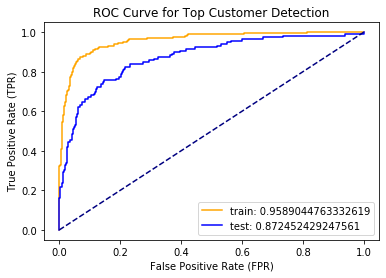

SVM


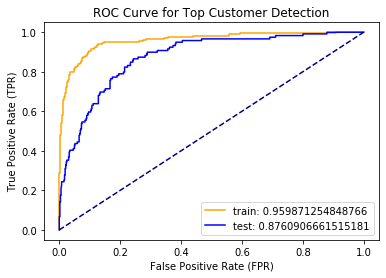

DT


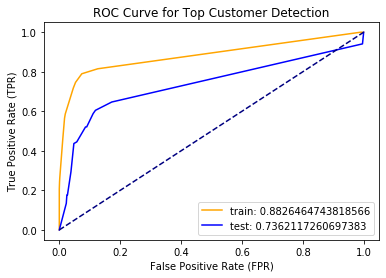

KNN


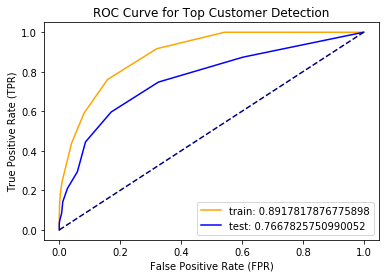

XGBoost


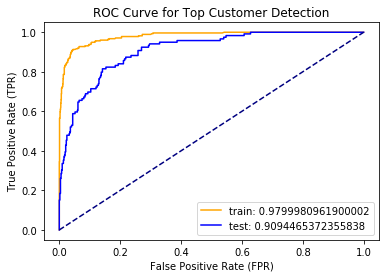

RandForest


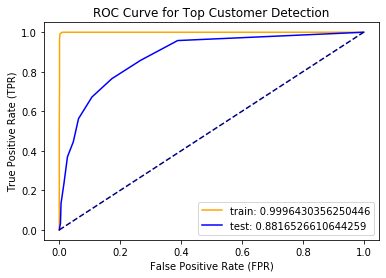

In [142]:
for model_tuple in my_models:
    #extract model name to list
    model_name = model_tuple[0]
    model = model_tuple[1]
    print(model_name)
    
    #fit the model on the train data
    model.fit(X_train, y_train)
    
    #get y-probability values on the train and test values
    y_proba_test = model.predict_proba(X_test)[:, 1]
    y_proba_train = model.predict_proba(X_train)[:, 1]

    #generate ROC curve with the y train values and y probability values
    fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
    roc_auc_train = roc_auc_score(y_train, y_proba_train)

    #generate ROC curve with the y test values and y probability values
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    roc_auc_test = roc_auc_score(y_test, y_proba_test)

    #plot the roc curve
    plt.figure()
    plt.plot(fpr_train, tpr_train, c="orange", label="train: "+str(roc_auc_train))
    plt.plot(fpr_test, tpr_test, c="blue", label="test: "+str(roc_auc_test))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve for Top Customer Detection')
    plt.legend()
    plt.show();

A high AUC value on the test data indicates that the model will result in a better classification with better predictions. From this analysis, Logistic Regression, XGBoost, and Random Forest were selected for hyperparameter optimization.

# Hyperparameter Optimization

### Logistic Regression Model - Cross Validation

Starting with the Logistic Regression model, the hyperparameters were optimized. 

The following code is a manual hyperparameter optimization with 5 fold cross validations - pipelines and gridsearch was later used to improve efficiency

In [143]:
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
my_scaler = StandardScaler()
X_remainder = my_scaler.fit_transform(X_remainder)
X_test = my_scaler.transform(X_test)

C values and regularization were optimized first:

In [34]:
#initialize the lists to store values
cross_validation_score = []
f1_scores = []
penalty_list = []
solver_list = []
C_value_list = []

#list the hyperparameters to test
C_range = np.array([.0000001,.000001,.00001,.0001,.001,.1,1,10,100,1000,10000,100000,1000000,10000000,100000000])
l1_solver_range = ['liblinear', 'saga']
l2_solver_range = ['liblinear', 'saga','lbfgs','sag']


for c in C_range:
    
    #l1 regularization was first tested
    for solver in l1_solver_range:
        
        #initialize model with the parameters
        LR_model = LogisticRegression(C=c,penalty='l1',solver=solver)
        
        #fit the model and get the f1 scores
        LR_model.fit(X_remainder, y_remainder)
        y_pred = LR_model.predict(X_test)
        fscore = f1_score(y_test, y_pred)
        
        #perform 5 fold cross validation
        cv_score = np.mean(cross_val_score(LR_model, X_remainder, y_remainder, cv = 5))
        
        #append the scores
        cross_validation_score.append(cv_score)
        f1_scores.append(fscore)
        penalty_list.append('l1')
        solver_list.append(solver)
        C_value_list.append(c)
        
    #l2 regularization was first tested    
    for solver in l2_solver_range:
        
        #initialize model with the parameters
        LR_model = LogisticRegression(C=c,penalty='l2',solver=solver)
        
        #fit the model and get the f1 scores
        LR_model.fit(X_remainder, y_remainder)
        y_pred = LR_model.predict(X_test)
        fscore = f1_score(y_test, y_pred)
        
        #perform 5 fold cross validation
        cv_score = np.mean(cross_val_score(LR_model, X_remainder, y_remainder, cv = 5))
        
        #append the scores
        cross_validation_score.append(cv_score)
        f1_scores.append(fscore)
        penalty_list.append('l2')
        solver_list.append(solver)
        C_value_list.append(c)

Results were compiled into a dataframe:

In [35]:
cross_val_df = pd.DataFrame({'penalty':penalty_list,'solver':solver_list,'C_val':C_value_list,'score':cross_validation_score,'f1_scores':f1_scores})
cross_val_df.head()

penalty     solver         C_val     score  f1_scores
0      l1  liblinear  1.000000e-07  0.809237   0.000000
1      l1       saga  1.000000e-07  0.809237   0.000000
2      l2  liblinear  1.000000e-07  0.852751   0.564593
3      l2       saga  1.000000e-07  0.809237   0.000000
4      l2      lbfgs  1.000000e-07  0.809237   0.000000

In [36]:
l1_cross_val_df = cross_val_df[cross_val_df['penalty']=='l1']
l2_cross_val_df = cross_val_df[cross_val_df['penalty']=='l2']

C values were then plotted with the cross validation scores:

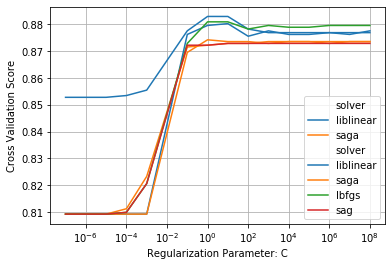

In [37]:
sns.lineplot(data=l1_cross_val_df, x='C_val', y='score', hue='solver')
sns.lineplot(data=l2_cross_val_df, x='C_val', y='score', hue='solver')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

According to the plot, the l2 regularization with liblinear solver at C = 1 had the highest score.

In [38]:
cross_val_df[cross_val_df['score'] == cross_val_df['score'].max()]

penalty     solver  C_val     score  f1_scores
38      l2  liblinear    1.0  0.882883    0.63388

C values were then plotted with the f1 scores:

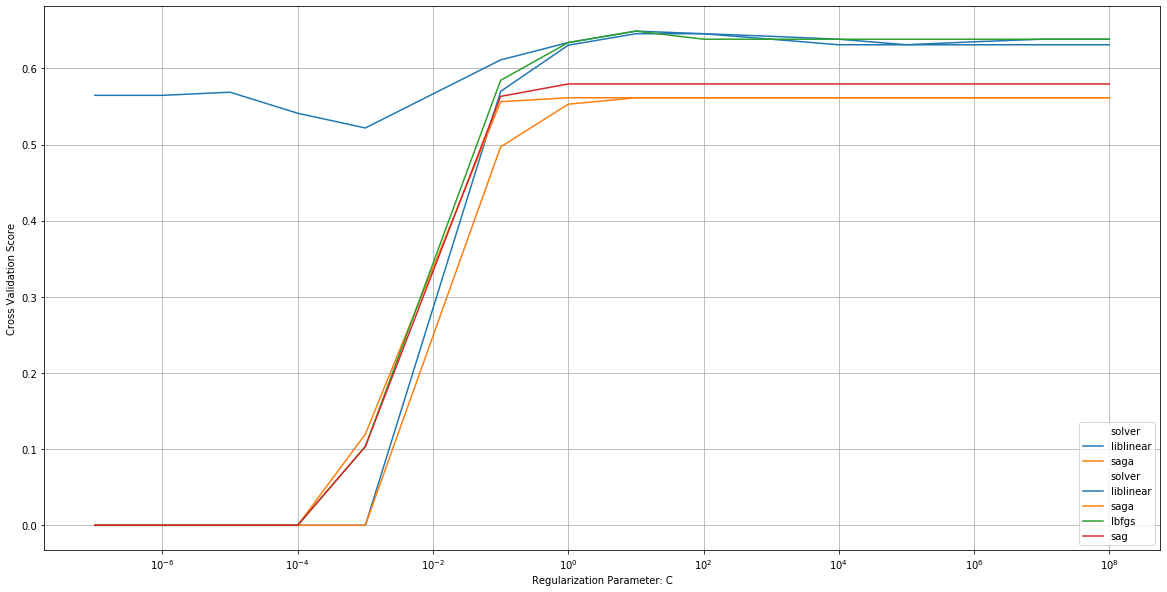

In [39]:
plt.figure(figsize=(20,10))
sns.lineplot(data=l1_cross_val_df, x='C_val', y='f1_scores',hue='solver')
sns.lineplot(data=l2_cross_val_df, x='C_val', y='f1_scores', hue='solver')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

According to the plot, the l2 regularization with liblinear/lbfgs solvers at C = 10 had the highest scores.

In [40]:
cross_val_df[cross_val_df['f1_scores'] == cross_val_df['f1_scores'].max()]

penalty     solver  C_val     score  f1_scores
44      l2  liblinear   10.0  0.882876   0.648936
46      l2      lbfgs   10.0  0.880869   0.648936

## Hyperparameter Optimization with Pipeline

To improve the efficiency of optimizing hyperparameters, pipelines and gridsearch was then used.

### Scoring on Accuracy, Precision, Recall, and F1

A function was generated to split the data into train/test data, scale the data, and check the various parameters on a 5 fold cross validation.

Multiple scoring was tested on accuracy, precision, roc-auc, and f1 scores.

In [22]:
def ModelGridSearch(model,params):

    #split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

    #list scoring methods
    scoring = {'accuracy','precision','roc_auc','f1'}

    #estimators listed to scale the data and select the model
    estimators = [('normalise', None), ('model', model)]

    #pipeline is developed using the estimators
    pipe = Pipeline(estimators)

    #parameters are passed into the grid
    param_grid = [params]

    #grid is fitted with the parameters
    grid = GridSearchCV(pipe, param_grid, cv=5,scoring=scoring,refit='precision',return_train_score=True)
    fittedgrid = grid.fit(X_train, y_train)
    
    #best estimator is returned based on precision as well as the grid search results
    return fittedgrid.best_estimator_, fittedgrid.best_score_, fittedgrid.cv_results_

Various parameters to be tested are listed:

In [23]:
LRparams = {'model': [LogisticRegression()],
'normalise': [StandardScaler(), None], 
'model__penalty': ['l1', 'l2'],
'model__C': [0.01,0.1,1,10,100]}

RFparams = {'model': [RandomForestClassifier()],
'normalise': [StandardScaler(), None], 
'model__max_features': [1, 2, 3],
'model__n_estimators':[100,300,500]}

XGBparams = {'model': [XGBClassifier()],
'normalise': [StandardScaler(), None], 
'model__max_depth': [1,3,5], 
'model__learning_rate': [0.01,0.05,0.1],
'model__n_estimators':[100,300,500],
'model__gamma':[0,1,5]}

The grid search is then run:

In [131]:
bestLR, precisionLR, gridLR = ModelGridSearch(LogisticRegression(),LRparams)
bestRF, precisionRF, gridRF = ModelGridSearch(RandomForestClassifier(),RFparams)
bestXGB, precisionXGB, gridXGB = ModelGridSearch(XGBClassifier(),XGBparams)

Models with the best precision are then listed, with logistic regression leading with preicion of 0.89

In [132]:
print(f"LR Precision Score: {precisionLR}")
print(f"RF Precision Score: {precisionRF}")
print(f"XGB Precision Score: {precisionXGB}")

LR Precision Score: 0.8963592465098489
RF Precision Score: 0.8616389801630765
XGB Precision Score: 0.8754356559326439


XGB is refit with new parameters:

In [24]:
bestXGB, precisionXGB, gridXGB = ModelGridSearch(XGBClassifier(),XGBparams)

The results of the gridsearch are unpacked into a lists:

In [25]:
gamma_vals = []
learning_rate = []
max_depth = []
n_estimators = []

for i in range(0,len(gridXGB['params'])):
    gamma_vals.append(gridXGB['params'][i]['model__gamma'])
    learning_rate.append(gridXGB['params'][i]['model__learning_rate'])
    n_estimators.append(gridXGB['params'][i]['model__n_estimators'])
    max_depth.append(gridXGB['params'][i]['model__max_depth'])

Which are then placed in a dataframe along with precision, accuracy, and ROC AUC scores

In [31]:
XGB_results = pd.DataFrame({'gamma':gamma_vals,
                            'learning_rate':learning_rate,
                            'max_depth':max_depth,
                            'n_estimators':n_estimators,
                            'precision':gridXGB['mean_test_precision'],
                            'accuracy':gridXGB['mean_test_accuracy'],
                            'roc-auc':gridXGB['mean_test_roc_auc']})

### XGBoost Model Performance: Precision

A sample of the gridsearch results are plotted against precision scores, with number of estimators as the x values and learning rate as the legend. Gamma is kept constant at zero and max depth kept constant at 3.

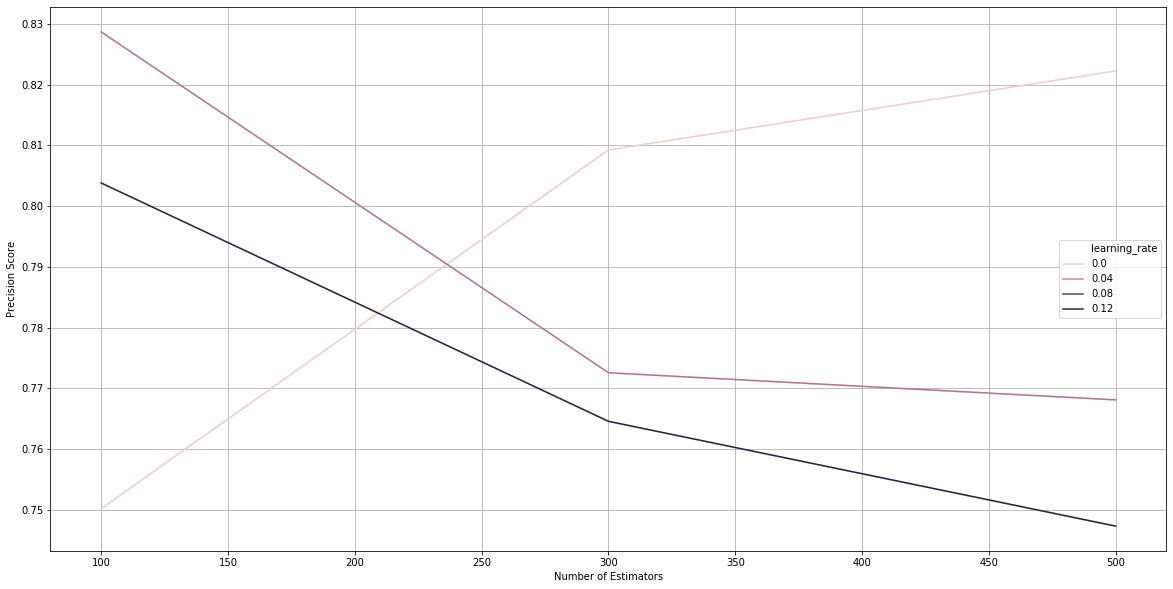

In [32]:
plt.figure(figsize=(20,10))
sns.lineplot(data=XGB_results[(XGB_results['gamma']==0) & (XGB_results['max_depth']==3)], 
             x='n_estimators', 
             y='precision',
             hue='learning_rate')
plt.xlabel('Number of Estimators')
plt.ylabel('Precision Score')
plt.grid()
plt.show()

### XGBoost Model Performance: Accuracy
This is then repeated with accuracy scores

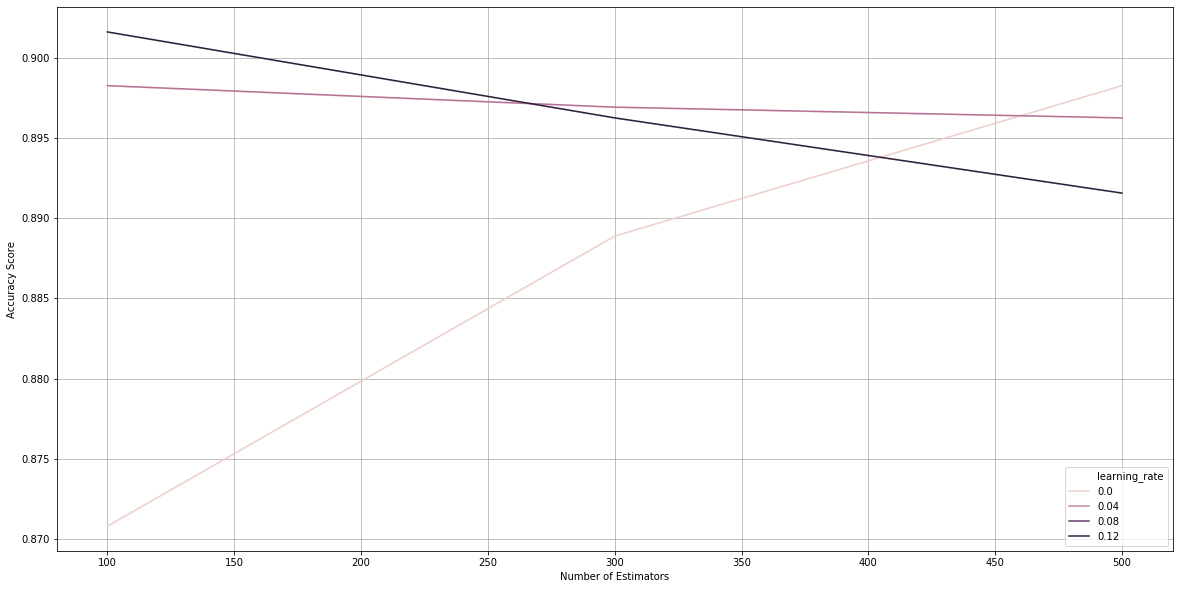

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(data=XGB_results[(XGB_results['gamma']==0) & (XGB_results['max_depth']==3)], 
             x='n_estimators', 
             y='accuracy',
             hue='learning_rate')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.grid()
plt.show()

### XGBoost Model Performance: ROC-AUC

ROC-AUC scores are then examined with the same parameters as above. 

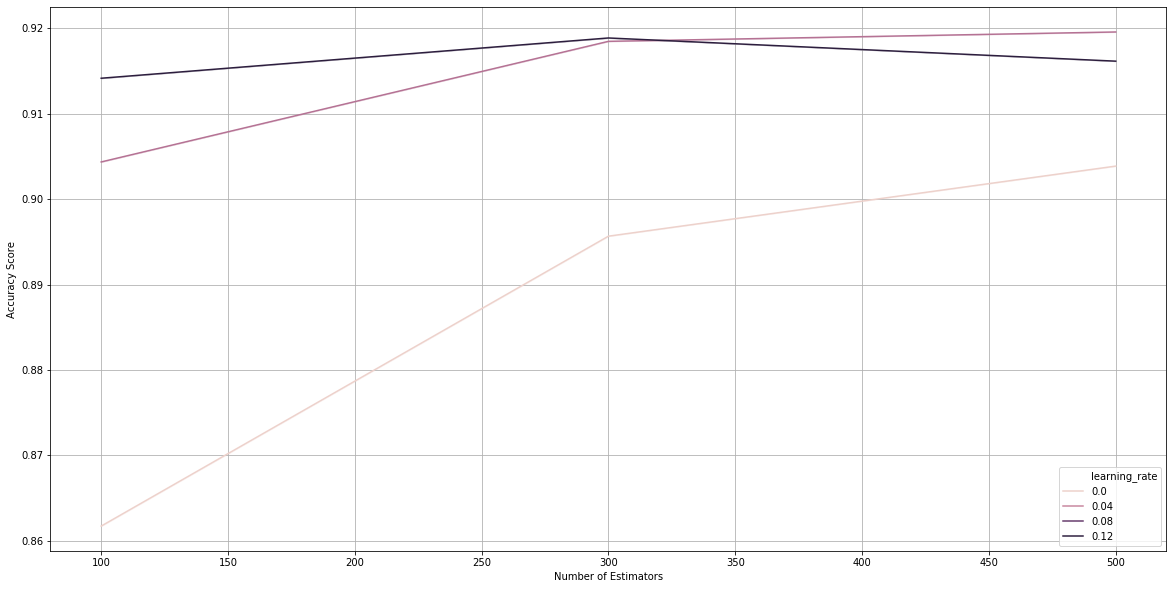

In [43]:
plt.figure(figsize=(20,10))
sns.lineplot(data=XGB_results[(XGB_results['gamma']==0) & (XGB_results['max_depth']==3)], 
             x='n_estimators', 
             y='roc-auc',
             hue='learning_rate')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.grid()
plt.show()

Finally, the dataframe is sorted to view top 5 results of the XGB grid search based on ROC AUC scores:

In [40]:
XGB_results.sort_values('roc-auc',ascending=False).head(5)

gamma  learning_rate  max_depth  n_estimators  precision  accuracy  \
89       1           0.05          5           500   0.791904  0.898929   
86       1           0.05          5           300   0.791904  0.898929   
87       1           0.05          5           300   0.791904  0.898929   
88       1           0.05          5           500   0.791904  0.898929   
102      1           0.10          5           100   0.784815  0.896252   

      roc-auc  
89   0.920016  
86   0.920016  
87   0.920016  
88   0.920016  
102  0.919889

Top 5 based on precision:

In [41]:
XGB_results.sort_values('precision',ascending=False).head(5)

gamma  learning_rate  max_depth  n_estimators  precision  accuracy  \
58       1           0.01          1           500   0.875436  0.870147   
59       1           0.01          1           500   0.875436  0.870147   
4        0           0.01          1           500   0.875436  0.870147   
5        0           0.01          1           500   0.875436  0.870147   
112      5           0.01          1           500   0.875436  0.870147   

      roc-auc  
58   0.887107  
59   0.887107  
4    0.887107  
5    0.887107  
112  0.887107

Top 5 based on accuracy:

In [42]:
XGB_results.sort_values('accuracy',ascending=False).head(5)

gamma  learning_rate  max_depth  n_estimators  precision  accuracy  \
70      1           0.01          5           500   0.812978  0.902276   
71      1           0.01          5           500   0.812978  0.902276   
42      0           0.10          3           100   0.803829  0.901606   
43      0           0.10          3           100   0.803829  0.901606   
30      0           0.05          5           100   0.811321  0.900937   

     roc-auc  
70  0.916593  
71  0.916593  
42  0.914147  
43  0.914147  
30  0.916078

Best Logistic Regression and XGB model parameters are then listed based on highest precision.

In [145]:
bestLR

Pipeline(memory=None,
         steps=[('normalise', None),
                ('model',
                 LogisticRegression(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [144]:
bestXGB

Pipeline(memory=None,
         steps=[('normalise',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=1,
                               min_child_weight=1, missing=None,
                               n_estimators=500, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

# Best Models

The best models are then compared by plotting the confusion matrix and ROC curves. Functions are as follows:

In [48]:
def PlotConfusionMatrix(fitted_model,X_test,y_test,threshold):
    
    #develop y probability values and classify y predictions based on the inputted threshold
    y_proba = fitted_model.predict_proba(X_test)[:,1]
    y_pred = np.where(y_proba > threshold, 1, 0)
    
    #develop confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #plot confusion matrix using a heatmap
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='GnBu')
    ax.set_xlabel('Predicted Top Customers')
    ax.set_ylabel('True Top Customers')
    ax.set_title('Confusion Matrix')

In [49]:
def PlotROC(fitted_model, X_test_, y_test):
    
    #develop y probability values and classify y predictions based on the inputted threshold
    y_proba_test = fitted_model.predict_proba(X_test)[:, 1]
    y_proba_train = fitted_model.predict_proba(X_train)[:, 1]

    #develop the roc curve for train set
    fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
    roc_auc_train = roc_auc_score(y_train, y_proba_train)
    
    #develop roc curve for test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    roc_auc_test = roc_auc_score(y_test, y_proba_test)

    #plot the figure
    plt.figure()
    plt.plot(fpr_train, tpr_train, c="orange", label="train: "+str(roc_auc_train))
    plt.plot(fpr_test, tpr_test, c="blue", label="test: "+str(roc_auc_test))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve for Top Customer Detection')
    plt.legend()
    plt.show();

The logistic regression model was revisted to view the confusion matrix:

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [53]:
bestLR_model = LogisticRegression(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False)
bestLR_model.fit(X_train,y_train)
bestLR_model.score(X_test,y_test)

0.8814352574102964

Threshold was set to 0.5:

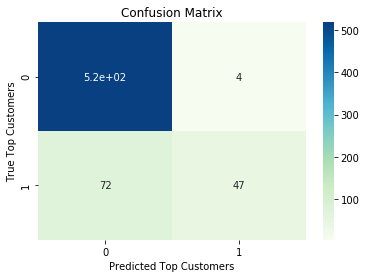

In [54]:
PlotConfusionMatrix(bestLR_model,X_test,y_test,0.5)

ROC AUC curve was then plotted:

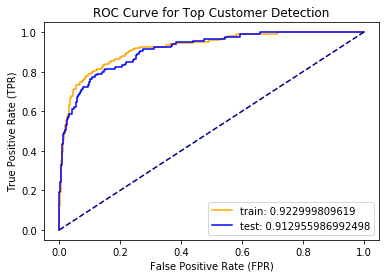

In [56]:
PlotROC(bestLR_model,X_test,y_test)

### Best XGB Models based on Precision, Accuracy, ROC-AUC:

Then, the best XGBoost models were compared:

In [59]:
my_scaler = StandardScaler()
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

Best precision model:

0.8673946957878315


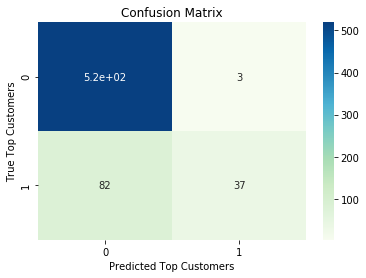

In [64]:
bestXGB_precision_model = XGBClassifier(gamma=1, 
                              learning_rate=0.01, 
                              max_depth=1, 
                              n_estimators=500)
bestXGB_precision_model.fit(X_train,y_train)
print(bestXGB_precision_model.score(X_test,y_test))
PlotConfusionMatrix(bestXGB_precision_model,X_test,y_test,0.5)

Best accuracy model:

0.8939157566302652


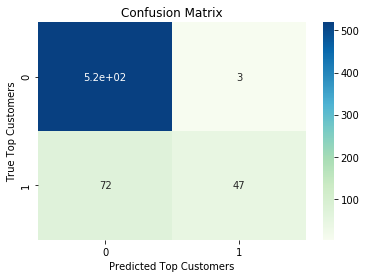

In [65]:
bestXGB_accuracy_model = XGBClassifier(gamma=1, 
                              learning_rate=0.01, 
                              max_depth=5, 
                              n_estimators=500)
bestXGB_accuracy_model.fit(X_train,y_train)
print(bestXGB_accuracy_model.score(X_test,y_test))
PlotConfusionMatrix(bestXGB_accuracy_model,X_test,y_test,0.72)

Best AUC model:

0.8985959438377535


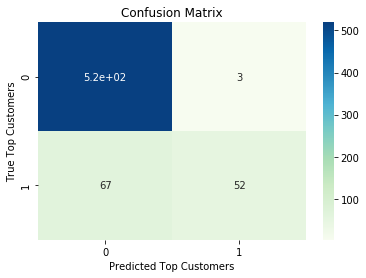

In [66]:
bestXGB_auc_model = XGBClassifier(gamma=1, 
                              learning_rate=0.05, 
                              max_depth=5, 
                              n_estimators=500)
bestXGB_auc_model.fit(X_train,y_train)
print(bestXGB_auc_model.score(X_test,y_test))
PlotConfusionMatrix(bestXGB_auc_model,X_test,y_test,0.77)

Overall, the best model was the XGBoost Model that scored the highest AUC (with threshold 0.77). This was selected for the final results.

**The average value of all Class 0 Classified Customers by this Model: 868**

**The average value of all Class 0 Classified Customers by this Model: 5674**

**Additional Annual Revenue from Obtaining 50 Predicted Top Customers: 283,700**

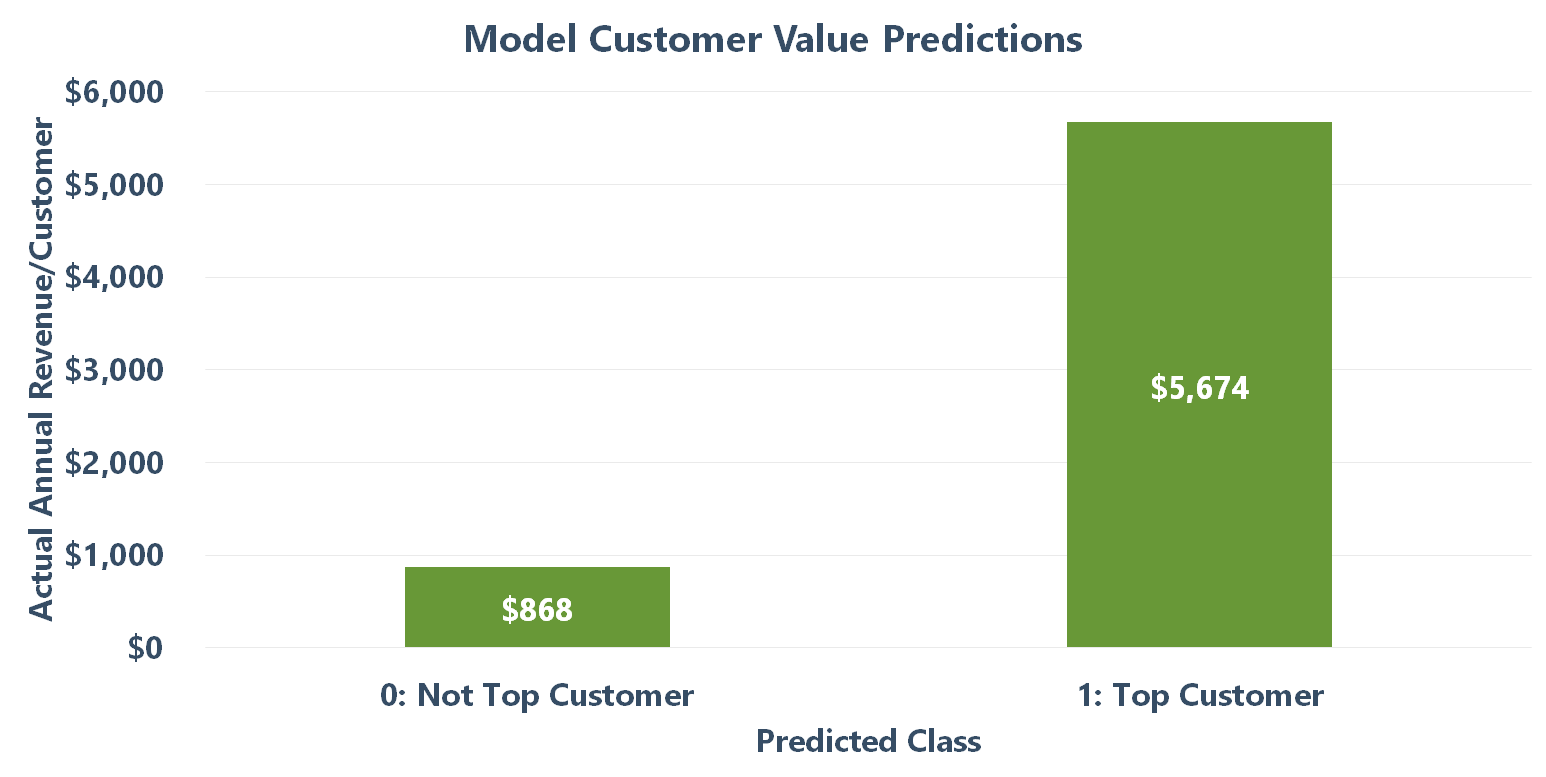

# Next Steps:
The next steps will be to conduct an analysis of error in order to determine which variables are contributing to the classification of false positives. This will allow for a better capture of the true positive values.